### PART - B

### USED LLMs
####   llama3.2 | deepseek-r1:1.5b | mistral

In [ ]:
# using ollama
%pip install -U langchain-ollama

In [ ]:
import os
from langchain_community.chat_models import ChatOllama
from langchain.schema import SystemMessage, HumanMessage

# Define function to initialize different local LLMs
def get_local_llm(model_name):
    return ChatOllama(model=model_name, temperature=0.7)

# Available local models
llama_model = get_local_llm("llama3.2")
deepseek_model = get_local_llm("deepseek-r1:1.5b")
mistral_model = get_local_llm("mistral")

C:\Users\Dell\AppData\Local\Temp\ipykernel_10216\2112080848.py:7: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  return ChatOllama(model=model_name, temperature=0.7)


In [3]:
problem_statement="""NYU, an insurance company wants to digitize a range of business processes and provide a complete solution that addresses all aspects of the agent-insurer relationship. Consider yourself as a part of Requirement Analyst team at Retinodes Software Company, and your job is to gather and prioritize the set of requirements. In this new requirement of the project, there are no existing systems that can be analyzed for the development. Requirements have to be gathered, negotiated, validated and prioritized through multiple stakeholders which is a complex process because all stakeholders have different perspectives, requirements and priorities. Therefore, Retinodes want to have a requirements engineering framework that can be used in market-facing projects. To start with, you need to identify the set of stakeholders associated with the system, the domain information about the insurance market, and possible features. The first product NYU wanted you to develop consolidated insurance packages which can compete with the packages provided by other insurance companies. Another product is based on the customer priority, based on the insurance policies available the customer can create his/her own package and send a request for the review. The system has to automatically analyze the package, provide suggestions (if any), and at last give a competing price for the package. To understand the problem domain, existing packages has to be analyzed and the demands and restrictions from the insurance policy and agents have to be understood completely. The requirements and feasibility report generated by you, will further used by the development team for implementation."""

### Identify Stakeholders, End-Users, Functional & Non-functional Requirements

In [8]:
def generate_prompt(problem_statement):
    return f"""
### Role Assignment:
You are a **requirement analyst** responsible for gathering and analyzing system requirements for a **Market-Driven Insurance System**. Your job is to identify stakeholders, end-users, and system requirements based on the given problem statement.

### Task:
Analyze the problem statement and extract the following:
1️⃣ **Stakeholders:** Identify **primary** and **secondary** stakeholders.
2️⃣ **End-users:** List the different categories of end-users.
3️⃣ **Functional Requirements:** Identify system features and functionalities.
4️⃣ **Non-functional Requirements:** Identify system constraints, performance, security, and usability aspects.

### Contextual Information:
- **Primary stakeholders** are directly involved in system development, usage, or decision-making.
- **Secondary stakeholders** are indirectly affected but influence the system.
- **Functional requirements** define the features the system **must perform**.
- **Non-functional requirements** define **how** the system should behave (performance, security, scalability, etc.).

### Instructions:
- **Use Few-Shot Prompting:** Refer to the following example to ensure accurate extraction:
  **Example:**
  🔹 **Primary Stakeholders:** Insurance Company Executives, Business Analysts
  🔹 **Secondary Stakeholders:** Government Regulators, Competing Insurance Firms
  🔹 **End-users:** Insurance Agents, Customers
  🔹 **Functional Requirement:** The system should allow customers to create personalized insurance packages.
  🔹 **Non-functional Requirement:** The system should support **high availability** with 99.9% uptime.

- **Output format:** Provide structured output in a numbered list.

### Problem Statement:
{problem_statement}

### Closing:
If any information is ambiguous or unclear, make logical assumptions and document them explicitly.
"""

In [ ]:
def run_llm(model, prompt):
    response = model([SystemMessage(content="You are an expert requirement analyst."), 
                      HumanMessage(content=prompt)])
    return response.content

# Function to save output to a text file
def save_output(model_name, output):
    filename = f"{model_name}_output.txt"
    with open(filename, "w", encoding="utf-8") as file:
        file.write(f"Model: {model_name}\n")
        file.write("==================================\n")
        file.write(output + "\n")
    print(f"✅ Output saved to {filename}")
    
# Example Prompt
prompt = generate_prompt(problem_statement)

# Run models and save results
# llama_output = run_llm(llama_model, prompt)
# save_output("llama3.2", llama_output)

# deepseek_output = run_llm(deepseek_model, prompt)
# save_output("deepseek-r1", deepseek_output)

mistral_output = run_llm(mistral_model, prompt)
save_output("mistral", mistral_output)

✅ Output saved to mistral_output.txt


### Gnerate User Stories from Problem Statements

In [10]:
import ollama

# Function to generate user stories
def generate_user_stories(model_name, problem_statement, step1_output):
    prompt = f"""
    You are an expert requirement analyst specializing in user stories following the INVEST framework.

    ## Problem Statement:
    {problem_statement}

    ## Context Specification (Output from Step 1):
    {step1_output}

    ## Guidelines:
    - Generate user stories that are **Independent, Negotiable, Valuable, Estimable, Small, and Testable** (INVEST).
    - Use the format:
        **Front of the Card:**  
        *As a [role], I want to [action] so that [benefit].*  
        **Back of the Card:**  
        - **Success:** 
            (a) [List conditions for success]  
            (b) [List conditions for success]  
        - **Failure - Display Message:** 
            (a) [List error scenarios]
            (b) [List error scenarios]

    ## Few-Shot Examples:

    **Front of the Card:**  
    As a customer, I want to browse and compare insurance packages so that I can choose the best plan for my needs.  

    **Back of the Card:**  
    - **Success:**  
        (a) Display available insurance packages from different providers.  
        (b) Show comparison table with features, pricing, and benefits.  
    - **Failure - Display Message:**  
        (a) "No available insurance packages at the moment, please check later."  
        (b) "System error, please try again."

    **Front of the Card:**  
    As an insurance agent, I want to manage customer policies so that I can assist clients with their insurance needs.  

    **Back of the Card:**  
    - **Success:**  
        (a) View customer policies and their details.  
        (b) Update policy information upon customer request.  
        (c) Generate a new quote based on customer requirements.  
    - **Failure - Display Message:**  
        (a) "Customer policy not found."  
        (b) "Unauthorized access, please log in as an agent."  
        (c) "System error, please try again later."  

    ## Task:
    Based on the problem statement and step1_output files,
    generate 10 user stories following the INVEST format.
    Ensure stories **cover different Stakeholders(Primary & Secondary) and End-users** and **include success and failure cases**.

    Output **ONLY** the user stories in the specified format.
    """

    
    response = ollama.chat(model=model_name, messages=[{"role": "user", "content": prompt}])
    
    return response["message"]["content"]

# Define the list of models
# models = ["llama3.2", "deepseek-r1:1.5b", "mistral"]
models = ["mistral"]

# Function to read content from a file
def read_from_file(filename):
    with open(filename, "r", encoding="utf-8") as file:
        return file.read().strip()
    
# Loop through each model and generate user stories
for model_name in models:
    print(f"🚀 Running LLM: {model_name}...")

    # Handle deepseek-r1:1.5b separately for file naming
    if model_name == "deepseek-r1:1.5b":
        step1_filename = "deepseek-r1_output.txt"
        output_filename = "deepseek-r1_user_stories_output.txt"
    else:
        step1_filename = f"{model_name}_output.txt"
        output_filename = f"{model_name}_user_stories_output.txt"

    # Read Step 1 Output for the respective model
    step1_output = read_from_file(step1_filename)

    # Generate user stories
    user_stories_output = generate_user_stories(model_name, problem_statement, step1_output)

    # Save Output to a .txt File
    with open(output_filename, "w", encoding="utf-8") as file:
        file.write(user_stories_output)

    print(f"✅ User stories saved successfully in '{output_filename}'!\n")

print("🎉 All models have completed execution!")

🚀 Running LLM: mistral...
✅ User stories saved successfully in 'mistral_user_stories_output.txt'!

🎉 All models have completed execution!


###  Identify 3 different EPICs (or collection of user stories) where the conflicts between the requirements occur?

In [11]:
# Function to generate conflicting EPICs
def generate_conflicting_epics(model_name, problem_statement, user_stories):
    prompt = f"""
    You are an expert business analyst specializing in requirement conflict resolution.

    ## Problem Statement:
    {problem_statement}

    ## User Stories:
    {user_stories}

    ## Task:
    - Identify **three EPICs** where **conflicts between requirements occur**.
    - Each EPIC should include **two conflicting user stories**.
    - Clearly explain the **conflict**.
    - Propose a **resolution strategy**.

    ## Example EPIC with Conflict:
    
    **EPIC: Policy Customization vs. Standardized Offerings**  
    **Conflicting User Stories:**  
    - As a customer, I want to fully customize my insurance package so that I can get exactly what I need.  
    - As NYU Management, I want to offer only a few well-defined insurance packages so that our operations remain scalable and easy to manage.  
      
    **Conflict:**  
    - Customers want flexibility, but NYU Management prefers structured, pre-defined policies to reduce complexity & risks.  
      
    **Resolution Strategy:**  
    ✅ **Guided Customization:**  
      - Offer pre-configured packages as a starting point.  
      - Allow limited customization within predefined parameters (e.g., adjusting coverage amount, adding riders).  
      - Use AI-driven recommendations to help users choose the best package without making the process overly complex.  

    **Now, generate three EPICs with similar conflict-resolution analysis.**
    """

    response = ollama.chat(model=model_name, messages=[{"role": "user", "content": prompt}])
    
    return response["message"]["content"]


# Define the list of models
# models = ["llama3.2", "deepseek-r1:1.5b", "mistral"]
models = ["mistral"]

# Function to read content from a file
def read_from_file(filename):
    with open(filename, "r", encoding="utf-8") as file:
        return file.read().strip()
    
# Loop through each model and generate user stories
for model_name in models:
    print(f"🚀 Running LLM: {model_name}...")

    # Handle deepseek-r1:1.5b separately for file naming
    if model_name == "deepseek-r1:1.5b":
        user_stories_filename = "deepseek-r1_user_stories_output.txt"
        epics_output_filename = "deepseek-r1_conflicting_epics.txt"
    else:
        user_stories_filename = f"{model_name}_user_stories_output.txt"
        epics_output_filename = f"{model_name}_conflicting_epics.txt"

    # Read Step 1 Output for the respective model
    user_stories = read_from_file(user_stories_filename)

    # Generate user stories
    conflicting_epics_output = generate_conflicting_epics(model_name, problem_statement, user_stories)

    # Save Output to a .txt File
    with open(epics_output_filename, "w", encoding="utf-8") as file:
        file.write(conflicting_epics_output)

    print(f"✅ Conflicting EPICs saved successfully in '{epics_output_filename}'!\n")

print("🎉 All models have completed execution!")

🚀 Running LLM: mistral...
✅ Conflicting EPICs saved successfully in 'mistral_conflicting_epics.txt'!

🎉 All models have completed execution!


In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


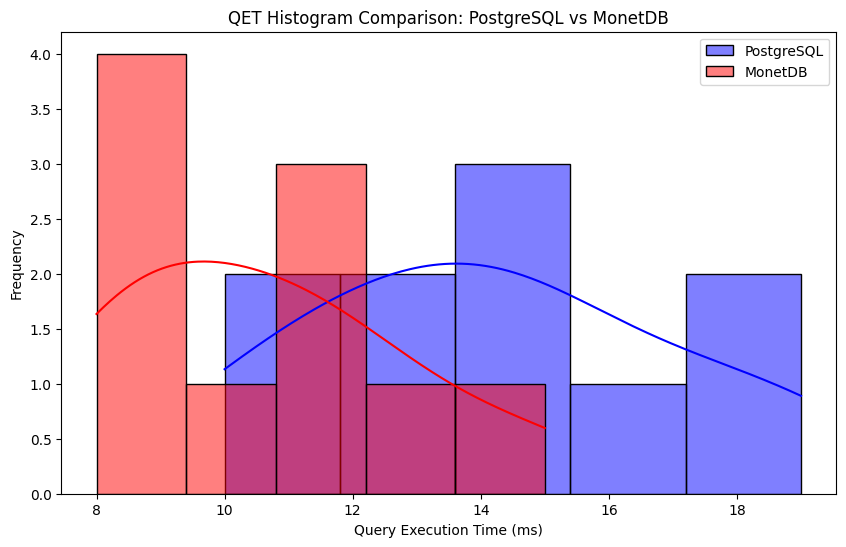

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data: Replace with actual QET values
data = {
    "PostgreSQL": [10, 12, 15, 18, 14, 13, 16, 11, 14, 19],  # in ms
    "MonetDB": [8, 9, 11, 13, 10, 9, 12, 8, 11, 15]          # in ms
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df["PostgreSQL"], bins=5, color="blue", label="PostgreSQL", kde=True)
sns.histplot(df["MonetDB"], bins=5, color="red", label="MonetDB", kde=True)

# Labels and legend
plt.xlabel("Query Execution Time (ms)")
plt.ylabel("Frequency")
plt.title("QET Histogram Comparison: PostgreSQL vs MonetDB")
plt.legend()
plt.show()


In [2]:
%pip install matplotlib

     ---------------------------------------- 8.0/8.0 MB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 3.9 MB/s eta 0:00:00
     -------------------------------------- 218.6/218.6 kB 6.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
